### Synopsis

This code reads and plots the SAXS data collected from H06 in capillaries at 12-ID-B on 04/13/2021

In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from numpy import sqrt, sin, cos, pi, exp

fn_path = '/home/12id-b/2021_Data/2021_1/ZuoApr13/Processed/'



### Define function that reads APS 12-ID-B data

In [2]:

def Read_12ID(fn_full):

    ql = np.zeros(1)
    Iq = np.zeros(1)

    with open(fn_full) as f:
        for line in f:
            if line.startswith('%'):
                pass
            else:
                _ = line.split('\t')       
                ql = np.append(ql, float(_[0]))
                Iq = np.append(Iq, float(_[1]))

    return ql, Iq


 ### Read data from 12-ID-B data base

In [3]:

fn = 'SPA1_10C_00070.avg'
ql, Iq_1 = Read_12ID(fn_path+fn)

fn = 'SPA1_10C_00071.avg'
_, Iq_2 = Read_12ID(fn_path+fn)

fn = 'SBufferB_10C_00076.avg'
_, Iq_Buf = Read_12ID(fn_path+fn)

Iq_A_10C = Iq_1-Iq_Buf
Iq_B_10C = Iq_2-Iq_Buf


fn = 'SBufferB_30C_00077.avg'
_, Iq_Buf = Read_12ID(fn_path+fn)

fn = 'SPA1B_30C_00078.avg'
_, Iq_1 = Read_12ID(fn_path+fn)

fn = 'SPA3B_30C_00081.avg'
ql, Iq_2 = Read_12ID(fn_path+fn)

Iq_A_30C = Iq_1-Iq_Buf
Iq_B_30C = Iq_2-Iq_Buf


### Figure rendering
Sample `Measurement` has been temperature-cycled for 5~10 times.   
Sample `Reference` has been kept at 4 C fridge prior to this measurement.

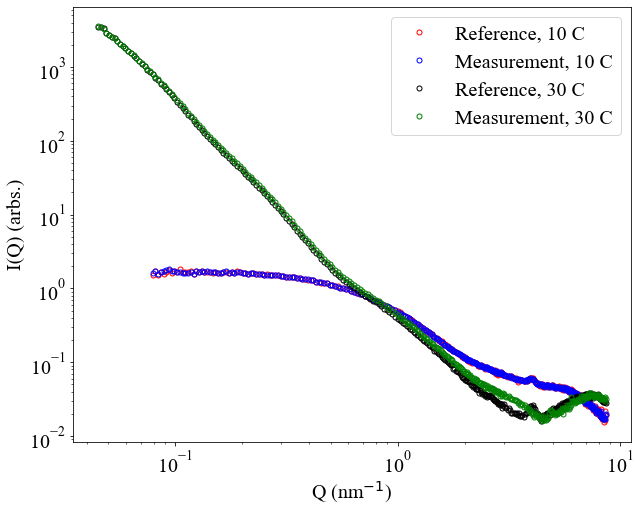

In [4]:

pl_range = np.arange(10,len(Iq_A_30C)-10)
pl_range_1 = np.arange(30,len(Iq_A_30C)-10)

fs = 20
plt.rcParams['font.size'] = fs
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# plt.xlim(2.7e-3, 5.7e-2)
# plt.ylim(5e-2, 5e1)
plt.xticks([1e-2, 1e-1, 1e0],fontsize=fs)
plt.yticks([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],fontsize=fs)
ax.plot(10*ql[pl_range_1], Iq_A_10C[pl_range_1], color='r', fillstyle='none', marker='o', markersize=5, 
    linestyle = 'none', label='Reference, 10 C')
ax.plot(10*ql[pl_range_1], Iq_B_10C[pl_range_1], color='b', fillstyle='none', marker='o', markersize=5, 
    linestyle = 'none', label='Measurement, 10 C')
ax.plot(10*ql[pl_range], Iq_A_30C[pl_range], color='k', fillstyle='none', marker='o', markersize=5, 
    linestyle = 'none', label='Reference, 30 C')
ax.plot(10*ql[pl_range], Iq_B_30C[pl_range], color='g', fillstyle='none', marker='o', markersize=5, 
    linestyle = 'none', label='Measurement, 30 C')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Q (nm$^{-1}$)', fontsize=fs)
ax.set_ylabel('I(Q) (arbs.)', fontsize=fs)
ax.legend(fontsize=fs)
plt.savefig('IvsQ.pdf', dpi=100, format='pdf', facecolor='w', edgecolor='w', transparent=True)
